In [1]:
clean_up=True # removes gams-related files in work-folder if true
%run StdPackages.ipynb
os.chdir(py['main'])
import Production,ShockFunction,ReadData
os.chdir(curr)
data_folder = os.getcwd()+'\\Data'
gams_folder = os.getcwd()+'\\gamsmodels\\A1'

# A very simple input-displacing model

We consider the simple case with:
* Two technologies, using a combination of two fuels and capital in a leontief-nest.
* Technology $1$ produces two goods $(u1,u2)$. Technology $2$ produces one good $(u3)$. This nest is CET (normalized).
* $u1$ is used to produce a component $C1$, goods $(u2,u3)$ are combined as component $C2$. This is MNL (normalized).
* Components $(C1,C2)$ are combined into one good $E$. This is CES.

## 1: Trees

*Data file:*

In [2]:
data_file = 'TreeData.xlsx'

*Main tree:*

In [3]:
nt = nesting_tree.nesting_tree(name='A1')

*Add Trees:*

In [4]:
nt.add_tree(data_folder+'\\'+data_file,tree_name='T_inp',**{'sheet':'T'})
nt.add_tree(data_folder+'\\'+data_file,tree_name='T_out',**{'sheet':'U', 'type_io':'output'})
nt.add_tree(data_folder+'\\'+data_file,tree_name='C',**{'sheet':'C', 'type_f':'MNL'})
nt.add_tree(data_folder+'\\'+data_file,tree_name='E',**{'sheet':'E'})
nt.run_all()

*Read in data on variables as well:*

In [5]:
[DataBase.GPM_database.merge_dbs(nt.database,excel2py.xl2PM.pm_from_workbook(data_folder+'\\'+data_file,{sheet:'vars'}),'first') for sheet in ('T','U','C','E')];

## 2: Production module

In [6]:
gm = Production.pr_static(nt=nt,work_folder=work_folder,**{'data_folder':gams_folder,'name':'A1'})
gm.write_and_run(kwargs_init={'check_variables':True})

In [7]:
db = gm.model_instances['baseline'].out_db
gm.model_instances['baseline'].modelstat,gm.model_instances['baseline'].solvestat

(16.0, 1.0)

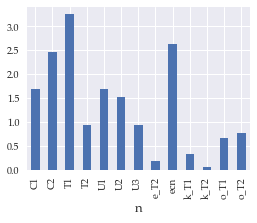

In [8]:
db.get('qD').plot.bar(figsize=(4,3));

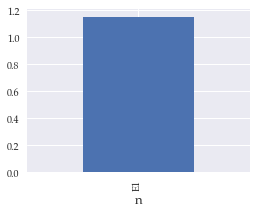

In [9]:
db.get('PbT').plot.bar(figsize=(4,3));